<a href="https://www.kaggle.com/code/leuldereje/titanic-test-first-trial?scriptVersionId=115092940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Import the libraries**

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning the unesseary data

In [5]:
df.drop(['Name','Ticket','Fare'],axis = 1, inplace = True )

# check if there is nullvalue and kill them

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.replace('-','nan')
df.replace('na','nan')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN,S
887,888,1,1,female,19.0,0,0,B42,S
888,889,0,3,female,NaN,1,2,NaN,S
889,890,1,1,male,26.0,0,0,C148,C


# age can't be null so use the mean maybe

In [8]:
df['Age'].mean()
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

# 💡 check the skewness 

In [11]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
dtype: float64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


## check for quantile

In [13]:
q1=df['SibSp'].quantile(0.25)
q2=df['SibSp'].quantile(0.75)
q1

0.0


# 🆙🤔

In [14]:
q2

1.0

# who is WHO

In [15]:
df['SibSp']=np.where(df['SibSp']<q1,q1,df['SibSp'])
df['SibSp']=np.where(df['SibSp']>q2,q2,df['SibSp'])
df.skew()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          0.784821
Parch          2.749117
dtype: float64

# OKAy !

In [16]:
df['Parch']=np.sqrt(df['Parch'])
df['Parch'].skew()

1.5297990732860154

# let's check the categorical data into numeric dataset

In [17]:
dummies=pd.get_dummies(df['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
df=pd.concat([df,dummies],axis='columns')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
0,1,0,3,male,22.0,1.0,0.0,S,0,1
1,2,1,1,female,38.0,1.0,0.0,C,1,0
2,3,1,3,female,26.0,0.0,0.0,S,1,0
3,4,1,1,female,35.0,1.0,0.0,S,1,0
4,5,0,3,male,35.0,0.0,0.0,S,0,1


# now we can drop the non sense choose either sex to drop 😉

In [19]:
df.drop(['Sex','female'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,male
0,1,0,3,22.0,1.0,0.0,S,1
1,2,1,1,38.0,1.0,0.0,C,0
2,3,1,3,26.0,0.0,0.0,S,0
3,4,1,1,35.0,1.0,0.0,S,0
4,5,0,3,35.0,0.0,0.0,S,1


In [20]:
dummies1=pd.get_dummies(df['Embarked'])
dummies1.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
df=pd.concat([df,dummies1],axis='columns')
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,male,C,Q,S
0,1,0,3,22.0,1.0,0.0,S,1,0,0,1
1,2,1,1,38.0,1.0,0.0,C,0,1,0,0
2,3,1,3,26.0,0.0,0.0,S,0,0,0,1
3,4,1,1,35.0,1.0,0.0,S,0,0,0,1
4,5,0,3,35.0,0.0,0.0,S,1,0,0,1


In [22]:
df.drop(['Embarked'],axis = 1, inplace = True )
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
0,1,0,3,22.0,1.0,0.0,1,0,0,1
1,2,1,1,38.0,1.0,0.0,0,1,0,0
2,3,1,3,26.0,0.0,0.0,0,0,0,1
3,4,1,1,35.0,1.0,0.0,0,0,0,1
4,5,0,3,35.0,0.0,0.0,1,0,0,1


# 🎨 now Vincent van Gogh 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

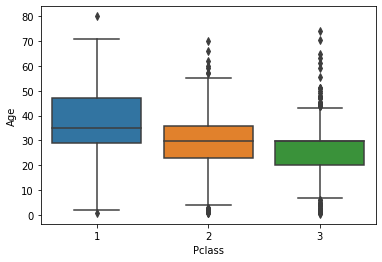

In [23]:
sns.boxplot(x='Pclass',y='Age',data=df)

# why not check the obvious 👀

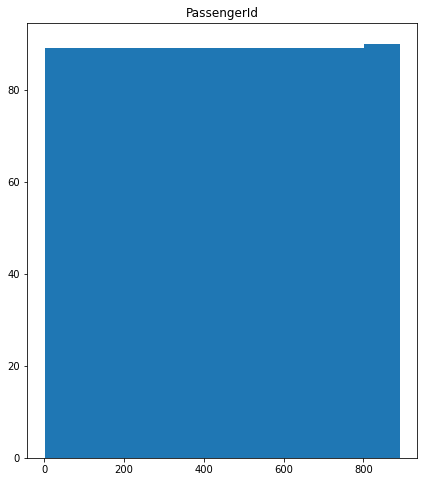

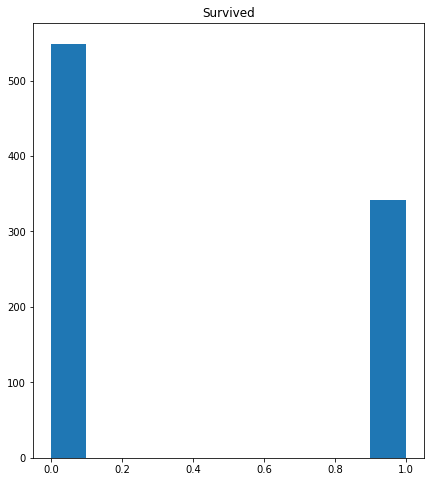

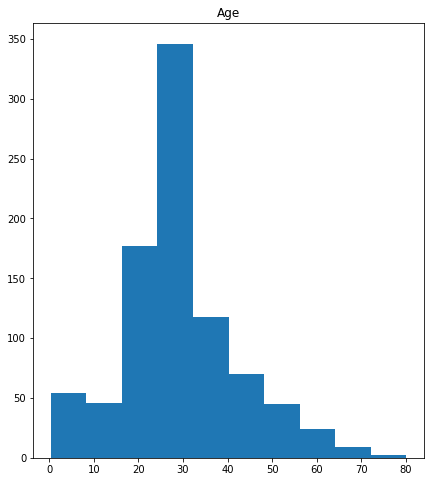

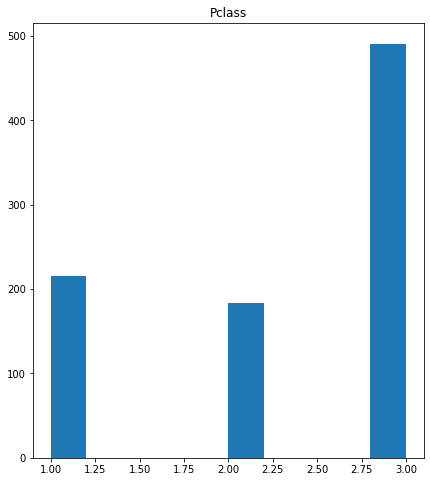

In [24]:
numeric= ['PassengerId','Survived' ,'Age' , 'Pclass']
for column in numeric:
    plt.figure(figsize=(7,8))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

# how about their correlation

In [25]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.053397,0.000348,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.115867,0.121652,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.076009,-0.006792,0.131900,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.148409,-0.237261,0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.053397,0.115867,-0.076009,-0.148409,1.000000,0.404346,-0.203203,0.034759,-0.055398,0.004412
Parch,0.000348,0.121652,-0.006792,-0.237261,0.404346,1.000000,-0.257096,0.011815,-0.095097,0.049494
male,0.042939,-0.543351,0.131900,0.084153,-0.203203,-0.257096,1.000000,-0.082853,-0.074115,0.119224
C,-0.001205,0.168240,-0.243292,0.032024,0.034759,0.011815,-0.082853,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,-0.013855,-0.055398,-0.095097,-0.074115,-0.148258,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,-0.019336,0.004412,0.049494,0.119224,-0.782742,-0.499421,1.000000


# Okay then 🧠

In [26]:
x_df=df.iloc[:,2:]
y_df=df.Survived

In [27]:
x_df

,Pclass,Age,SibSp,Parch,male,C,Q,S
0,3,22.000000,1.0,0.000000,1,0,0,1
1,1,38.000000,1.0,0.000000,0,1,0,0
2,3,26.000000,0.0,0.000000,0,0,0,1
3,1,35.000000,1.0,0.000000,0,0,0,1
4,3,35.000000,0.0,0.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0.0,0.000000,1,0,0,1
887,1,19.000000,0.0,0.000000,0,0,0,1
888,3,29.699118,1.0,1.414214,0,0,0,1
889,1,26.000000,0.0,0.000000,1,1,0,0


In [28]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# now insert the test data sets

In [29]:
test.shape

(418, 11)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Cabin          327
Embarked         0
dtype: int64

In [33]:
test.replace('-','nan')
test.replace('na','nan')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,892,3,male,34.5,0,0,NaN,Q
1,893,3,female,47.0,1,0,NaN,S
2,894,2,male,62.0,0,0,NaN,Q
3,895,3,male,27.0,0,0,NaN,S
4,896,3,female,22.0,1,1,NaN,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,NaN,S
414,1306,1,female,39.0,0,0,C105,C
415,1307,3,male,38.5,0,0,NaN,S
416,1308,3,male,NaN,0,0,NaN,S


In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Cabin          327
Embarked         0
dtype: int64

In [35]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [36]:
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [37]:
test.drop(['Cabin'],axis=1,inplace=True)

In [38]:
dummies=pd.get_dummies(test['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [39]:
test=pd.concat([test,dummies],axis='columns')
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
0,892,3,male,34.5,0,0,Q,0,1
1,893,3,female,47.0,1,0,S,1,0
2,894,2,male,62.0,0,0,Q,0,1
3,895,3,male,27.0,0,0,S,0,1
4,896,3,female,22.0,1,1,S,1,0


In [40]:
test.drop(['Sex','female'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,male
0,892,3,34.5,0,0,Q,1
1,893,3,47.0,1,0,S,0
2,894,2,62.0,0,0,Q,1
3,895,3,27.0,0,0,S,1
4,896,3,22.0,1,1,S,0


In [41]:
dummies1=pd.get_dummies(test['Embarked'])
dummies1.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [42]:
test=pd.concat([test,dummies1],axis='columns')
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,male,C,Q,S
0,892,3,34.5,0,0,Q,1,0,1,0
1,893,3,47.0,1,0,S,0,0,0,1
2,894,2,62.0,0,0,Q,1,0,1,0
3,895,3,27.0,0,0,S,1,0,0,1
4,896,3,22.0,1,1,S,0,0,0,1


In [43]:
test.drop(['Embarked'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,C,Q,S
0,892,3,34.5,0,0,1,0,1,0
1,893,3,47.0,1,0,0,0,0,1
2,894,2,62.0,0,0,1,0,1,0
3,895,3,27.0,0,0,1,0,0,1
4,896,3,22.0,1,1,0,0,0,1


In [44]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,male,C,Q,S
PassengerId,1.000000,-0.026751,-0.030874,0.003818,0.043080,0.023245,-0.027419,-0.035731,0.048008
Pclass,-0.026751,1.000000,-0.440782,0.001087,0.018721,0.108615,-0.318543,0.252608,0.120783
Age,-0.030874,-0.440782,1.000000,-0.079535,-0.045073,0.000011,0.161612,-0.012719,-0.136822
SibSp,0.003818,0.001087,-0.079535,1.000000,0.306895,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.043080,0.018721,-0.045073,0.306895,1.000000,-0.159120,-0.005791,-0.132948,0.092201
male,0.023245,0.108615,0.000011,-0.099943,-0.159120,1.000000,-0.033684,-0.115574,0.105883
C,-0.027419,-0.318543,0.161612,-0.016365,-0.005791,-0.033684,1.000000,-0.199786,-0.767375
Q,-0.035731,0.252608,-0.012719,-0.098824,-0.132948,-0.115574,-0.199786,1.000000,-0.474962
S,0.048008,0.120783,-0.136822,0.079367,0.092201,0.105883,-0.767375,-0.474962,1.000000


In [45]:
x_test=test.iloc[:,1:]

# let's get to the business 🕴️

for this case I used Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_df,y_df)

LogisticRegression()

In [47]:
x_df

,Pclass,Age,SibSp,Parch,male,C,Q,S
0,3,22.000000,1.0,0.000000,1,0,0,1
1,1,38.000000,1.0,0.000000,0,1,0,0
2,3,26.000000,0.0,0.000000,0,0,0,1
3,1,35.000000,1.0,0.000000,0,0,0,1
4,3,35.000000,0.0,0.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0.0,0.000000,1,0,0,1
887,1,19.000000,0.0,0.000000,0,0,0,1
888,3,29.699118,1.0,1.414214,0,0,0,1
889,1,26.000000,0.0,0.000000,1,1,0,0


In [48]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# ⬆️ 😮

In [50]:
model.score(x_test,y_predict)
## perfection 🤞

1.0

In [51]:
data=pd.DataFrame(y_predict,columns=['survived'])

In [52]:
data2=pd.DataFrame(test.PassengerId)

In [53]:
result=pd.concat([data2,data],axis=1)
result

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# phew the end 👨‍💻

In [54]:
result.to_csv('kaggle_titanic_1.csv',index=False)